# importing libraries

In [1]:
import pandas as pd
import numpy as np
import string
import re
import nltk
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


# Load the datas

In [2]:
# Training data
path="train data.csv"
df_train_data=pd.read_csv(path)
df_train_data

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
...,...,...,...
31957,31958,0,ate @user isz that youuu?ðððððð...
31958,31959,0,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,..."


In [3]:
# Test data
path="test data.csv"
df_test_data=pd.read_csv(path)
df_test_data

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedic...
1,31964,@user #white #supremacists want everyone to s...
2,31965,safe ways to heal your #acne!! #altwaystohe...
3,31966,is the hp and the cursed child book up for res...
4,31967,"3rd #bihday to my amazing, hilarious #nephew..."
...,...,...
17192,49155,thought factory: left-right polarisation! #tru...
17193,49156,feeling like a mermaid ð #hairflip #neverre...
17194,49157,#hillary #campaigned today in #ohio((omg)) &am...
17195,49158,"happy, at work conference: right mindset leads..."


# Exploratory Data Analysis

In [4]:
#Missing data-Train
df_train_data.isnull().sum()


id       0
label    0
tweet    0
dtype: int64

In [5]:
#Missing data-Test
df_test_data.isnull().sum()

id       0
tweet    0
dtype: int64

# Exploring the target 

In [6]:
#count the target
#0-->"not hate"
#1-->"hate"
df_train_data["label"].value_counts()

label
0    29720
1     2242
Name: count, dtype: int64

 predict the tweet is hate/not,
 0--> not hate speech,
 1--> hate speech

In [7]:
#hate speech filtering
Hate_tweet=df_train_data[df_train_data["label"]==1]["tweet"]
Hate_tweet

13       @user #cnn calls #michigan middle school 'buil...
14       no comment!  in #australia   #opkillingbay #se...
17                                  retweet if you agree! 
23         @user @user lumpy says i am a . prove it lumpy.
34       it's unbelievable that in the 21st century we'...
                               ...                        
31934    lady banned from kentucky mall. @user  #jcpenn...
31946    @user omfg i'm offended! i'm a  mailbox and i'...
31947    @user @user you don't have the balls to hashta...
31948     makes you ask yourself, who am i? then am i a...
31960    @user #sikh #temple vandalised in in #calgary,...
Name: tweet, Length: 2242, dtype: object

In [8]:
#not hate speech filtering
Not_Hate_tweet=df_train_data[df_train_data["label"]==0]["tweet"]
Not_Hate_tweet

0         @user when a father is dysfunctional and is s...
1        @user @user thanks for #lyft credit i can't us...
2                                      bihday your majesty
3        #model   i love u take with u all the time in ...
4                   factsguide: society now    #motivation
                               ...                        
31956    off fishing tomorrow @user carnt wait first ti...
31957    ate @user isz that youuu?ðððððð...
31958      to see nina turner on the airwaves trying to...
31959    listening to sad songs on a monday morning otw...
31961                     thank you @user for you follow  
Name: tweet, Length: 29720, dtype: object

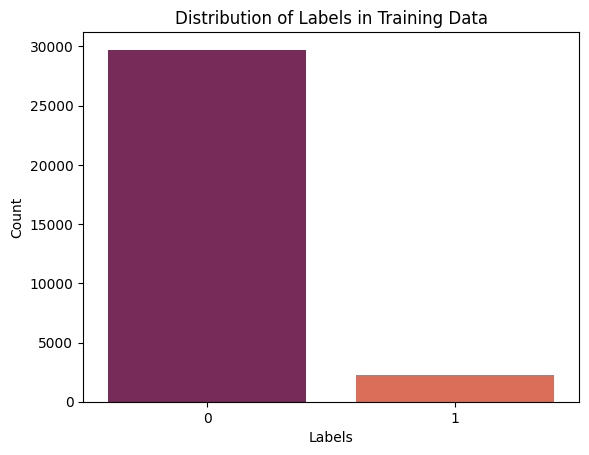

In [9]:
#visualizing the count in bar plot
sns.barplot(x=df_train_data["label"].value_counts().index,y=df_train_data["label"].value_counts(),palette="rocket")
plt.xlabel("Labels")
plt.ylabel("Count")
plt.title('Distribution of Labels in Training Data')
plt.show()

# Text Preprocessing
## Data Cleaning

In [10]:
df_train_data.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [11]:
df_train_data["tweet"][:5]

0     @user when a father is dysfunctional and is s...
1    @user @user thanks for #lyft credit i can't us...
2                                  bihday your majesty
3    #model   i love u take with u all the time in ...
4               factsguide: society now    #motivation
Name: tweet, dtype: object

In [12]:
df_test_data["tweet"][:5]

0    #studiolife #aislife #requires #passion #dedic...
1     @user #white #supremacists want everyone to s...
2    safe ways to heal your #acne!!    #altwaystohe...
3    is the hp and the cursed child book up for res...
4      3rd #bihday to my amazing, hilarious #nephew...
Name: tweet, dtype: object

In [13]:
# text cleaning
def clean_text(text):
    text = text.lower() #lower_case the text
    text = re.sub('\[.*?\]', '', text) #remove brackets and words
    text = re.sub('https?://\S+|www\.\S+', '', text) #remove urls
    text = re.sub('<.*?>+', '', text) #remove html tags
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)# remove punctuationz
    text = re.sub('\n', '', text) #r emove newline characters from the text.
    text = re.sub('\w*\d\w*', '', text) #remove digits
    text=re.sub(r'[^\x00-\x7F]+', '', text) # remove emoji
    return text

In [14]:
df_train_data["tweet"]=df_train_data["tweet"].apply(clean_text)
df_train_data["tweet"].head()

0     user when a father is dysfunctional and is so...
1    user user thanks for lyft credit i cant use ca...
2                                  bihday your majesty
3    model   i love u take with u all the time in u...
4                 factsguide society now    motivation
Name: tweet, dtype: object

In [15]:
df_test_data["tweet"]=df_test_data["tweet"].apply(clean_text)
df_test_data["tweet"].head()

0    studiolife aislife requires passion dedication...
1     user white supremacists want everyone to see ...
2    safe ways to heal your acne    altwaystoheal h...
3    is the hp and the cursed child book up for res...
4       bihday to my amazing hilarious nephew eli a...
Name: tweet, dtype: object

Text(0.5, 1.0, ' Hate speech')

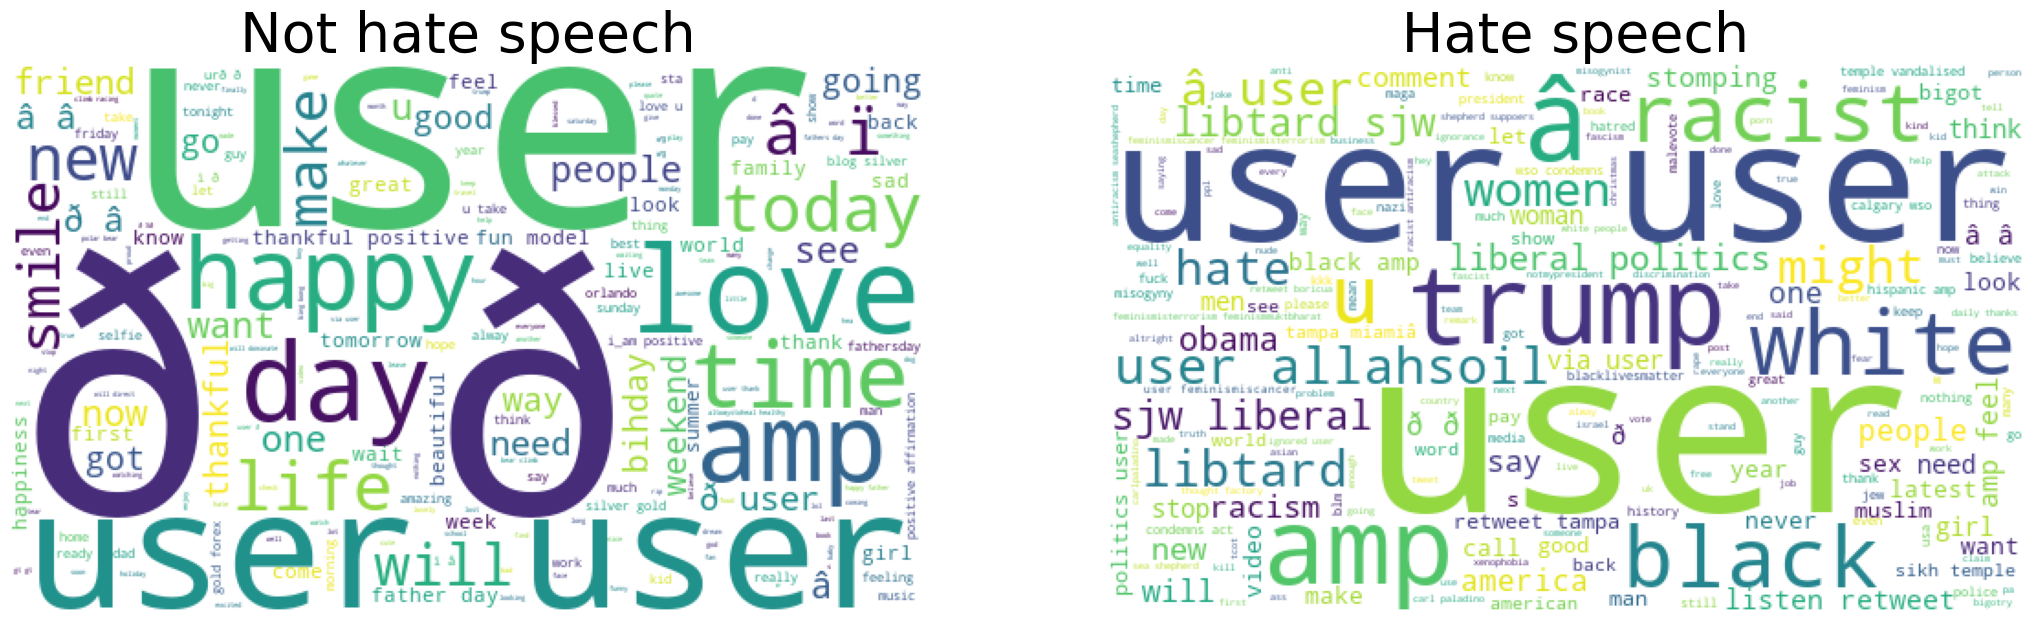

In [16]:
from wordcloud import WordCloud
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[26, 8])
#not hate speech
WordCloud1=WordCloud(background_color="white",width=500,height=300).generate(" ".join(Not_Hate_tweet))
ax1.imshow(WordCloud1)
ax1.axis("off")
ax1.set_title('Not hate speech',fontsize=40)
#hate speech
WordCloud2=WordCloud(background_color="white",width=500,height=300).generate(" ".join(Hate_tweet))
ax2.imshow(WordCloud2)
ax2.axis("off")
ax2.set_title(' Hate speech',fontsize=40)


# Tokenization

In [17]:
# split the sentences to word with help of tokenization
from nltk import word_tokenize
df_train_data["tweet"]=df_train_data["tweet"].apply(word_tokenize)
df_test_data["tweet"]=df_test_data["tweet"].apply(word_tokenize)


In [18]:
df_train_data["tweet"]

0        [user, when, a, father, is, dysfunctional, and...
1        [user, user, thanks, for, lyft, credit, i, can...
2                                  [bihday, your, majesty]
3        [model, i, love, u, take, with, u, all, the, t...
4                   [factsguide, society, now, motivation]
                               ...                        
31957                        [ate, user, isz, that, youuu]
31958    [to, see, nina, turner, on, the, airwaves, try...
31959    [listening, to, sad, songs, on, a, monday, mor...
31960    [user, sikh, temple, vandalised, in, in, calga...
31961                 [thank, you, user, for, you, follow]
Name: tweet, Length: 31962, dtype: object

In [19]:
df_test_data["tweet"]

0        [studiolife, aislife, requires, passion, dedic...
1        [user, white, supremacists, want, everyone, to...
2        [safe, ways, to, heal, your, acne, altwaystohe...
3        [is, the, hp, and, the, cursed, child, book, u...
4        [bihday, to, my, amazing, hilarious, nephew, e...
                               ...                        
17192    [thought, factory, leftright, polarisation, tr...
17193    [feeling, like, a, mermaid, hairflip, neverrea...
17194    [hillary, campaigned, today, in, ohioomg, amp,...
17195    [happy, at, work, conference, right, mindset, ...
17196    [my, song, so, glad, free, download, shoegaze,...
Name: tweet, Length: 17197, dtype: object

# Remove stopwords

In [20]:
# stopwords removing
nltk.download("stopwords")
def stop_words(text):
    stop_word = set(stopwords.words('english'))
    text=[words for words in text if words not in stop_word]
    return text

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Kavitha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [21]:
df_train_data["tweet"]=df_train_data["tweet"].apply(stop_words)
df_train_data["tweet"].head()

0    [user, father, dysfunctional, selfish, drags, ...
1    [user, user, thanks, lyft, credit, cant, use, ...
2                                    [bihday, majesty]
3                  [model, love, u, take, u, time, ur]
4                    [factsguide, society, motivation]
Name: tweet, dtype: object

In [22]:
df_test_data["tweet"]=df_test_data["tweet"].apply(stop_words)
df_test_data["tweet"].head()

0    [studiolife, aislife, requires, passion, dedic...
1    [user, white, supremacists, want, everyone, se...
2    [safe, ways, heal, acne, altwaystoheal, health...
3    [hp, cursed, child, book, reservations, alread...
4    [bihday, amazing, hilarious, nephew, eli, ahmi...
Name: tweet, dtype: object

# lemmentaization

In [23]:
# getting root words using lemmentaization
from nltk.stem import WordNetLemmatizer
def lemmentizer(text):
    lemma=WordNetLemmatizer()
    text=" ".join([lemma.lemmatize(words) for words in text])
    return text

In [24]:
df_train_data["tweet"]=df_train_data["tweet"].apply(lemmentizer)
df_train_data["tweet"].head()

0    user father dysfunctional selfish drag kid dys...
1    user user thanks lyft credit cant use cause do...
2                                       bihday majesty
3                          model love u take u time ur
4                        factsguide society motivation
Name: tweet, dtype: object

In [25]:
df_test_data["tweet"]=df_test_data["tweet"].apply(lemmentizer)
df_test_data["tweet"].head()

0    studiolife aislife requires passion dedication...
1    user white supremacist want everyone see new b...
2     safe way heal acne altwaystoheal healthy healing
3    hp cursed child book reservation already yes h...
4    bihday amazing hilarious nephew eli ahmir uncl...
Name: tweet, dtype: object

In [26]:
df_train_data

,id,label,tweet
0,1,0,user father dysfunctional selfish drag kid dys...
1,2,0,user user thanks lyft credit cant use cause do...
2,3,0,bihday majesty
3,4,0,model love u take u time ur
4,5,0,factsguide society motivation
...,...,...,...
31957,31958,0,ate user isz youuu
31958,31959,0,see nina turner airwave trying wrap mantle gen...
31959,31960,0,listening sad song monday morning otw work sad
31960,31961,1,user sikh temple vandalised calgary wso condem...


In [27]:
df_test_data

,id,tweet
0,31963,studiolife aislife requires passion dedication...
1,31964,user white supremacist want everyone see new b...
2,31965,safe way heal acne altwaystoheal healthy healing
3,31966,hp cursed child book reservation already yes h...
4,31967,bihday amazing hilarious nephew eli ahmir uncl...
...,...,...
17192,49155,thought factory leftright polarisation trump l...
17193,49156,feeling like mermaid hairflip neverready forma...
17194,49157,hillary campaigned today ohioomg amp used word...
17195,49158,happy work conference right mindset lead cultu...


# Model Building

In [28]:
train_data=df_train_data["tweet"]
test_data=df_test_data["tweet"]
y=df_train_data["label"]

In [29]:
train_data

0        user father dysfunctional selfish drag kid dys...
1        user user thanks lyft credit cant use cause do...
2                                           bihday majesty
3                              model love u take u time ur
4                            factsguide society motivation
                               ...                        
31957                                   ate user isz youuu
31958    see nina turner airwave trying wrap mantle gen...
31959       listening sad song monday morning otw work sad
31960    user sikh temple vandalised calgary wso condem...
31961                                    thank user follow
Name: tweet, Length: 31962, dtype: object

In [30]:
y


0        0
1        0
2        0
3        0
4        0
        ..
31957    0
31958    0
31959    0
31960    1
31961    0
Name: label, Length: 31962, dtype: int64

In [31]:
# spliting train and test data
x_train,x_test,y_train,y_test=train_test_split(train_data,y,test_size=0.25,random_state=2)

In [32]:
print("train_data",x_train.shape)
print("x_test",x_test.shape)

train_data (23971,)
x_test (7991,)


In [33]:
print("y_train",y_train.shape)
print("y_test",y_test.shape)

y_train (23971,)
y_test (7991,)


In [34]:
# extraction of features
tfidf = TfidfVectorizer()
train_tfidf = tfidf.fit_transform(x_train).toarray()
test_tfidf = tfidf.transform(x_test).toarray()

In [35]:
print(train_tfidf)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [36]:
print(test_tfidf)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


### LogisticRegression

In [37]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(train_tfidf,y_train)

LogisticRegression()

In [38]:
from sklearn.metrics import classification_report,accuracy_score
y_predict_lr=model.predict(test_tfidf)
print(classification_report(y_test,y_predict_lr))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      7408
           1       0.92      0.29      0.44       583

    accuracy                           0.95      7991
   macro avg       0.93      0.65      0.71      7991
weighted avg       0.95      0.95      0.93      7991



In [39]:
accuracy_score(y_test,y_predict_lr)

0.9465648854961832

### Naive Bayes

In [40]:
from sklearn.naive_bayes import GaussianNB
Model_nb=GaussianNB()
Model_nb.fit(train_tfidf,y_train)

GaussianNB()

In [41]:
y_predict_NB=Model_nb.predict(test_tfidf)
print(classification_report(y_test,y_predict_NB))

              precision    recall  f1-score   support

           0       0.97      0.86      0.91      7408
           1       0.25      0.62      0.36       583

    accuracy                           0.84      7991
   macro avg       0.61      0.74      0.63      7991
weighted avg       0.91      0.84      0.87      7991



In [42]:
accuracy_score(y_test,y_predict_NB)

0.8396946564885496

### Support vector machine

In [43]:
from sklearn.svm import LinearSVC

model_svc = LinearSVC()
model_svc.fit(train_tfidf, y_train)


LinearSVC()

In [44]:
y_predict_svc=model_svc.predict(test_tfidf)
print(classification_report(y_test,y_predict_svc))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      7408
           1       0.88      0.58      0.70       583

    accuracy                           0.96      7991
   macro avg       0.92      0.79      0.84      7991
weighted avg       0.96      0.96      0.96      7991



In [45]:
accuracy_score(y_test,y_predict_svc)

0.9633337504692779

### Random Forest

In [46]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(
    n_estimators=50,      # Use 50 trees instead of the default 100
    max_depth=10,         # Limit the depth of each tree
    max_features='sqrt',  # Consider sqrt(number of features) at each split
    max_samples=0.8,      # Train on 80% of the data
    n_jobs=-1             # Use all available CPU cores
)
model_rf.fit(train_tfidf, y_train)


RandomForestClassifier(max_depth=10, max_samples=0.8, n_estimators=50,
                       n_jobs=-1)

In [47]:
y_predict_rf=model_rf.predict(test_tfidf)
print(classification_report(y_test,y_predict_rf))


              precision    recall  f1-score   support

           0       0.93      1.00      0.96      7408
           1       0.00      0.00      0.00       583

    accuracy                           0.93      7991
   macro avg       0.46      0.50      0.48      7991
weighted avg       0.86      0.93      0.89      7991



In [48]:
accuracy_score(y_test,y_predict_rf)

0.9270429232886997

### Long-Short term memory

In [49]:
# libraies for lstm model
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Input,Dense


In [50]:
#tokenizing and padding the texts
token=Tokenizer()
token.fit_on_texts(x_train)
x_train_tk=token.texts_to_sequences(x_train)
x_test_tk=token.texts_to_sequences(x_test)
len(token.word_index)

30312

In [51]:
x_train_tk

[[1, 63, 2782, 40, 296],
 [17, 3, 124, 11079, 2547, 3071],
 [1, 42, 12, 6, 159, 11080, 11081, 1, 1, 1],
 [859, 328, 3072, 176, 11082],
 [178, 2184, 6, 986, 439, 178, 439, 1087, 1807, 184],
 [1204, 1698, 11],
 [23, 53, 11083, 471, 5593, 2350, 4637, 1240, 291, 1],
 [21, 11, 15, 20, 11084, 11085, 11086, 15],
 [2783, 4, 3, 3],
 [1, 37, 1699, 278, 1013, 11087, 2351, 1899],
 [130, 3, 411, 1808, 7185, 394, 483, 266, 531, 1],
 [4, 17, 3, 385, 60, 11088, 64, 405],
 [76, 34, 82, 77, 16, 139, 11089, 2028, 11090],
 [783, 107, 15, 71],
 [1, 1471, 1047, 658, 176],
 [2, 1121, 7186, 1014, 2185, 1294, 11091],
 [116, 126, 317, 126, 274, 688, 7187, 631, 9, 579, 1472, 301, 11092],
 [873, 1122, 1, 386, 5594, 119, 3073, 1],
 [1, 1, 1, 1, 116, 227, 5595, 145, 11093],
 [121, 179, 337, 102, 35],
 [1, 7188, 7189, 26, 39, 56, 2784, 323, 122],
 [1700, 2029, 85, 1, 1, 3440, 44, 419, 1900, 12, 117],
 [1123, 5596, 3441, 11094, 5597, 1295],
 [3442, 3443, 309, 569, 1, 4638],
 [1296, 3074],
 [3444, 508, 2030],
 [1015, 

In [52]:
x_test_tk

[[82, 38, 312, 534, 1, 1, 1, 3828],
 [4, 17, 3, 21702, 10255, 10256, 10257, 64, 64, 60],
 [185, 1, 965, 250, 24581, 3389],
 [1507, 3, 41, 27, 320],
 [181, 427, 1523, 187, 6006, 565, 1057, 4019],
 [10, 34, 21, 4, 165, 958, 362, 239, 932, 802, 285],
 [553, 18, 18, 1, 868, 43, 126, 237],
 [4517, 208, 124, 2408, 1670],
 [36, 545, 475, 1, 1223, 312, 7771, 175, 186, 4787],
 [1, 471, 756, 1, 1121, 896, 74, 21508],
 [75, 2, 5, 29, 5, 7, 52],
 [1, 524, 475, 240, 9164, 7687, 4548, 321, 17, 3, 697],
 [183, 107, 15, 71],
 [23247, 314, 357, 37, 358, 326, 37, 197, 134, 1310],
 [2272, 23, 53],
 [602, 177, 6527, 1, 3110, 20, 51, 128],
 [16, 21232, 16, 15],
 [1, 1589, 1851, 89],
 [848, 1632],
 [2380, 372, 839, 206],
 [121, 179, 337, 102, 35],
 [75, 2, 5, 29, 5, 7, 52],
 [75, 2, 5, 29, 5, 7, 52],
 [141, 582, 153, 582],
 [5014, 49, 596, 149, 614, 518, 442, 692, 633, 253, 1520],
 [847, 10771, 7171, 1283, 146],
 [1, 879, 885, 323, 5223, 772, 24, 19, 30172],
 [1848],
 [352, 352, 198, 1, 987, 1],
 [166, 116,

In [53]:
# Padding sequences
x_train_pad = pad_sequences(x_train_tk, maxlen=100)
x_test_pad = pad_sequences(x_test_tk, maxlen=100)

In [54]:
# model building
import tensorflow as tf
model_lstm = Sequential()
model_lstm.add(Embedding(input_dim=len(token.word_index)+1, output_dim=128, input_length=100))
model_lstm.add(LSTM(units=128))
model_lstm.add(Dense(1, activation='sigmoid'))


In [55]:
#compiling the model
model_lstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [56]:
# train the mode
history=model_lstm.fit(x_train_pad, y_train,validation_split=0.2,epochs=6,batch_size=128)

Epoch 1/6
150/150 ━━━━━━━━━━━━━━━━━━━━ 24s 143ms/step - accuracy: 0.9163 - loss: 0.2883 - val_accuracy: 0.9533 - val_loss: 0.1316
Epoch 2/6
150/150 ━━━━━━━━━━━━━━━━━━━━ 20s 135ms/step - accuracy: 0.9734 - loss: 0.0789 - val_accuracy: 0.9612 - val_loss: 0.1227
Epoch 3/6
150/150 ━━━━━━━━━━━━━━━━━━━━ 21s 139ms/step - accuracy: 0.9890 - loss: 0.0332 - val_accuracy: 0.9568 - val_loss: 0.1417
Epoch 4/6
150/150 ━━━━━━━━━━━━━━━━━━━━ 35s 234ms/step - accuracy: 0.9960 - loss: 0.0139 - val_accuracy: 0.9562 - val_loss: 0.1676
Epoch 5/6
150/150 ━━━━━━━━━━━━━━━━━━━━ 21s 143ms/step - accuracy: 0.9986 - loss: 0.0061 - val_accuracy: 0.9491 - val_loss: 0.1976
Epoch 6/6
150/150 ━━━━━━━━━━━━━━━━━━━━ 40s 134ms/step - accuracy: 0.9989 - loss: 0.0050 - val_accuracy: 0.9522 - val_loss: 0.2459


### Visualize the accuracy and loss

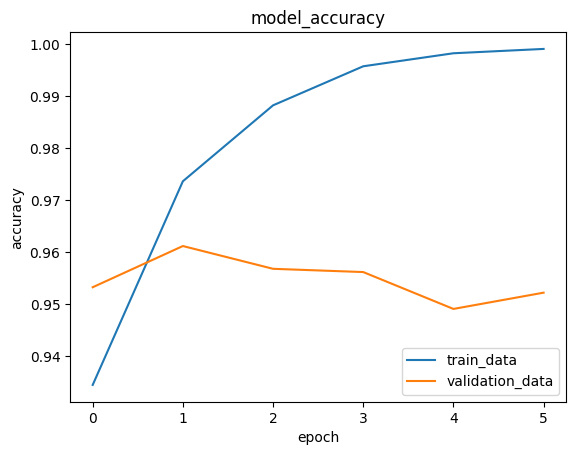

In [57]:

plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])

plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.title("model_accuracy")
plt.legend(["train_data","validation_data"],loc="lower right")

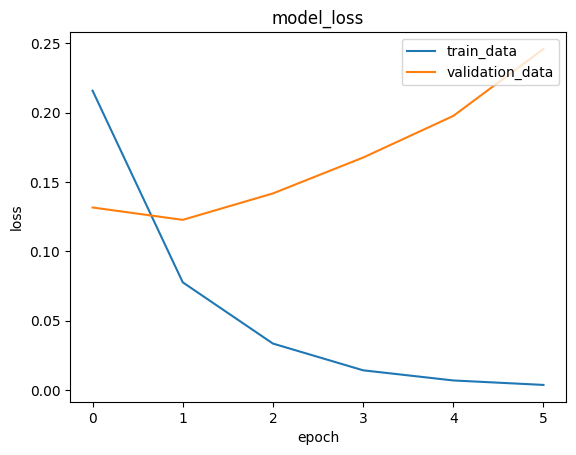

In [58]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])

plt.xlabel("epoch")
plt.ylabel("loss")
plt.title("model_loss")
plt.legend(["train_data","validation_data"],loc="upper right")

In [59]:
loss,accuracy=model_lstm.evaluate(x_test_pad,y_test)

250/250 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.9538 - loss: 0.2922


In [60]:
#prediction
y_lstm_predict=model_lstm.predict(x_test_pad)

250/250 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step


In [61]:
#comparing models accuracy
final_df=pd.DataFrame({"Models":['LR','NB','SVM','RF','LSTM'],
                      "score":[accuracy_score(y_test,y_predict_lr),
                               accuracy_score(y_test,y_predict_NB),
                               accuracy_score(y_test,y_predict_svc),
                               accuracy_score(y_test,y_predict_rf),
                             accuracy]})
final_df

,Models,score
0,LR,0.946565
1,NB,0.839695
2,SVM,0.963334
3,RF,0.927043
4,LSTM,0.956326


# Building the model system

In [62]:
# Creating the pipeline
from sklearn.pipeline import Pipeline
Model=Pipeline([("tfid",TfidfVectorizer()),
                ("SVC",LinearSVC())])
Model.fit(x_train,y_train)

Pipeline(steps=[('tfid', TfidfVectorizer()), ('SVC', LinearSVC())])

In [63]:
#load the data
df=pd.read_csv('test data.csv')

In [64]:
# model prediction with test datas and create dataframe
y_predict=Model.predict(df["tweet"])
df["labelprediction"]=y_predict
df


,id,tweet,labelprediction
0,31963,#studiolife #aislife #requires #passion #dedic...,0
1,31964,@user #white #supremacists want everyone to s...,0
2,31965,safe ways to heal your #acne!! #altwaystohe...,0
3,31966,is the hp and the cursed child book up for res...,0
4,31967,"3rd #bihday to my amazing, hilarious #nephew...",0
...,...,...,...
17192,49155,thought factory: left-right polarisation! #tru...,1
17193,49156,feeling like a mermaid ð #hairflip #neverre...,0
17194,49157,#hillary #campaigned today in #ohio((omg)) &am...,0
17195,49158,"happy, at work conference: right mindset leads...",0


In [65]:
# dataframe to csv
path="C:/Users/Kavitha/Desktop/CAPSTONE PROJECT/NLP_TWEET_EMOTIONS/.venv/final_prediction.csv"
df.to_csv(path,index=False)

In [66]:
# store the model using pickle
import pickle
with open('Support_vector_machine.pkl','wb') as files:
    pickle.dump(Model,files)

In [67]:
#open the model for prediction
with open('Support_vector_machine.pkl','rb') as files:
    Model=pickle.load(files)

In [68]:
# NOT HATE TWEET PREDICTION
prediction=Model.predict(["#studiolife #aislife #requires #passion #dedication #willpower to find #newmaterialsÃ¢Â€Â¦ "])
if prediction==0:
    print("NOT HATE TWEET")
else:
    print("HATE TWEET")

NOT HATE TWEET


In [69]:
# HATE TWEET PREDICTION
prediction_1=Model.predict(["thought factory: bbc neutrality on right wing fascism  #politics #media #blm #brexit #trump #leadership &gt;3 "])
if prediction_1==0:
    print("NOT HATE TWEET")
else:
    print("HATE TWEET")


HATE TWEET
